<a href="https://colab.research.google.com/github/AhrazKhan31/Deep-Learning-Lab/blob/main/Experiment1_MNISTusing_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install idx2numpy

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7904 sha256=fa0590b130f22359e00d544babe5e782e28b098c245dd7f14bba0e505455b46c
  Stored in directory: /root/.cache/pip/wheels/87/e5/e7/70fc742b3645ddf9d392f766feccbcc95cb3a3c806f8588af0
Successfully built idx2numpy


In [ ]:
import idx2numpy
image_file = '/content/drive/MyDrive/MNIST_data/train-images.idx3-ubyte'
label_file = '/content/drive/MyDrive/MNIST_data/train-labels.idx1-ubyte'

In [ ]:
images = idx2numpy.convert_from_file(image_file)
labels = idx2numpy.convert_from_file(label_file)

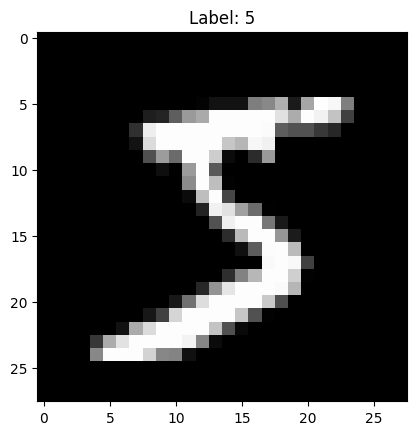

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[0], cmap='gray')
plt.title(f"Label: {labels[0]}")
plt.show()

In [ ]:
num_samples = images.shape[0]
num_features = images.shape[1] * images.shape[2]
data = images.reshape(num_samples, num_features)

data = np.concatenate((labels.reshape(num_samples, 1), data), axis=1)

np.random.shuffle(data)

data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:num_features + 1]
X_test = X_test / 255.

data_train = data[1000:num_samples].T
Y_train = data_train[0]
X_train = data_train[1:num_features + 1]
X_train = X_train / 255.

In [ ]:
images.shape[0]

60000

In [ ]:
images.shape[2]

28

In [ ]:
X_train.shape[0]

784

In [ ]:
def init_params():
    W1 = np.random.rand(256, 784) - 0.5
    b1 = np.random.rand(256, 1) - 0.5
    W2 = np.random.rand(128, 256) - 0.5
    b2 = np.random.rand(128, 1) - 0.5
    W3 = np.random.rand(10, 128) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

In [ ]:
def ReLU(Z):
    return np.maximum(0, Z)

def deriv_ReLU(Z):
  return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [ ]:
def forward_propagation(X, W1, b1, W2, b2, W3, b3):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def one_hot(Y):
    one_hot_Y=np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_propagation(X, Y, Z1, A1, Z2, A2, Z3, A3, W1, W2, W3):
    m = Y.size
    one_hot_Y = one_hot(Y)

    dZ3 = A3 - one_hot_Y
    dW3 = (1 / m) * dZ3.dot(A2.T)
    db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)

    dZ2 = W3.T.dot(dZ3) * deriv_ReLU(Z2)
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    W3 -= alpha * dW3
    b3 -= alpha * db3
    return W1, b1, W2, b2, W3, b3

In [ ]:
def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

In [ ]:
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_propagation(X, W1, b1, W2, b2, W3, b3)
        dW1, db1, dW2, db2, dW3, db3 = backward_propagation(X, Y, Z1, A1, Z2, A2, Z3, A3, W1, W2, W3)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)

        if i % 10 == 0:
            print("Iteration:", i)
            predictions = get_predictions(A3)
            accuracy = get_accuracy(predictions, Y)
            print("Accuracy:", accuracy)
    return W1, b1, W2, b2, W3, b3

In [ ]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration: 0
Accuracy: 0.0788135593220339
Iteration: 10
Accuracy: 0.6204406779661017
Iteration: 20
Accuracy: 0.6972203389830508
Iteration: 30
Accuracy: 0.7354745762711864
Iteration: 40
Accuracy: 0.7619152542372881
Iteration: 50
Accuracy: 0.7811694915254237
Iteration: 60
Accuracy: 0.7967457627118644
Iteration: 70
Accuracy: 0.8097966101694916
Iteration: 80
Accuracy: 0.819864406779661
Iteration: 90
Accuracy: 0.8289830508474576
Iteration: 100
Accuracy: 0.8367118644067797
Iteration: 110
Accuracy: 0.843728813559322
Iteration: 120
Accuracy: 0.8501525423728814
Iteration: 130
Accuracy: 0.855406779661017
Iteration: 140
Accuracy: 0.8601016949152542
Iteration: 150
Accuracy: 0.8642372881355932
Iteration: 160
Accuracy: 0.8677457627118644
Iteration: 170
Accuracy: 0.871457627118644
Iteration: 180
Accuracy: 0.8747288135593221
Iteration: 190
Accuracy: 0.8777457627118644
Iteration: 200
Accuracy: 0.8807288135593221
Iteration: 210
Accuracy: 0.8837627118644068
Iteration: 220
Accuracy: 0.8859322033898305
Ite

In [ ]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_propagation(X, W1, b1, W2, b2, W3, b3)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


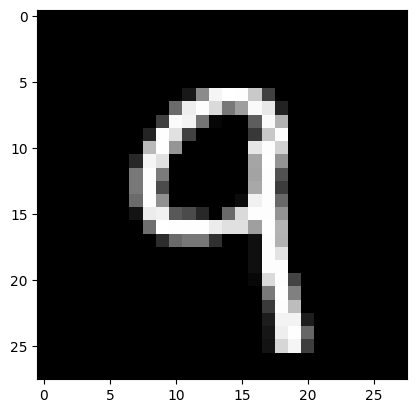

Prediction:  [3]
Label:  3


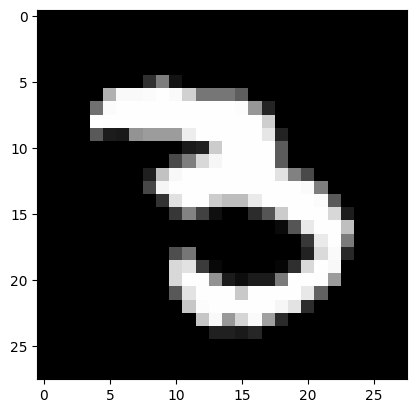

Prediction:  [0]
Label:  0


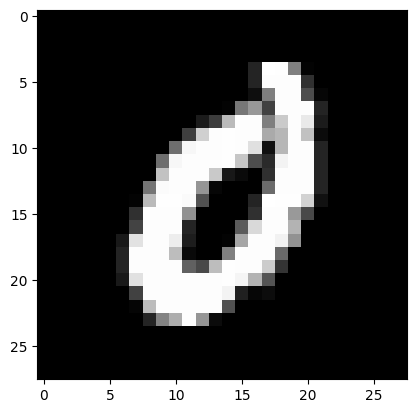

Prediction:  [5]
Label:  5


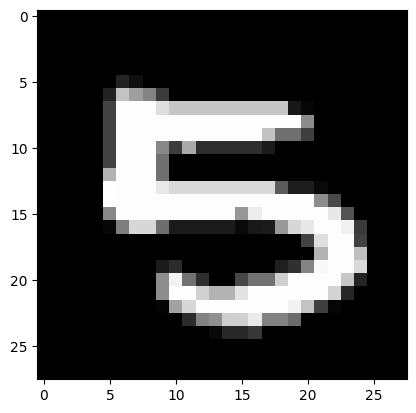

In [ ]:
test_prediction(0, W1, b1, W2, b2, W3, b3)
test_prediction(1, W1, b1, W2, b2, W3, b3)
test_prediction(2, W1, b1, W2, b2, W3, b3)
test_prediction(3, W1, b1, W2, b2, W3, b3)

In [ ]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2, W3, b3)
get_accuracy(test_predictions, Y_test)

0.913